In [21]:
import pandas as pd

sales = pd.read_csv('/content/SalesFINAL12312016.csv')
purchases = pd.read_csv('/content/PurchasesFINAL12312016.csv')
prices_2017 = pd.read_csv('/content/2017PurchasePricesDec.csv')
beg_inventory = pd.read_csv('/content/BegInvFINAL12312016.csv')
end_inventory = pd.read_csv('/content/EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('/content/InvoicePurchases12312016.csv')

sales.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


end-to-end Inventory Analytics + Demand Forecasting pipeline

[LOAD] /content/SalesFINAL12312016.csv -> shape (1048575, 14)
[LOAD] /content/PurchasesFINAL12312016.csv -> shape (2372474, 16)
[LOAD] /content/2017PurchasePricesDec.csv -> shape (12261, 9)
[LOAD] /content/BegInvFINAL12312016.csv -> shape (206529, 9)
[LOAD] /content/EndInvFINAL12312016.csv -> shape (224489, 9)
[LOAD] /content/InvoicePurchases12312016.csv -> shape (5543, 10)
[CLEAN] sales sample:


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Revenue,SKU
0,1_HARDERSFIELD_1004,1,1004,JIM BEAM W/2 ROCKS GLASSES,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,16.49,1004
1,1_HARDERSFIELD_1004,1,1004,JIM BEAM W/2 ROCKS GLASSES,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,32.98,1004
2,1_HARDERSFIELD_1004,1,1004,JIM BEAM W/2 ROCKS GLASSES,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,16.49,1004
3,1_HARDERSFIELD_1004,1,1004,JIM BEAM W/2 ROCKS GLASSES,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,14.49,1004
4,1_HARDERSFIELD_1005,1,1005,MAKER'S MARK COMBO PACK,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,69.98,1005


[SAVED] /content/outputs/sales_cleaned_sample.csv

=== EDA SUMMARY ===
Time range: 2016-01-01 00:00:00 to 2016-02-29 00:00:00
Unique SKUs: 7658
Unique Stores: 79
Top vendors: VendorName
DIAGEO NORTH AMERICA INC      125869
JIM BEAM BRANDS COMPANY        94057
MARTIGNETTI COMPANIES          76625
CONSTELLATION BRANDS INC       70792
E & J GALLO WINERY             65240
M S WALKER INC                 48889
PERNOD RICARD USA              48136
BACARDI USA INC                45616
ULTRA BEVERAGE COMPANY LLP     40953
SAZERAC CO INC                 37037
Name: count, dtype: int64
Total revenue (dataset): 33139375.29
[SAVED] /content/outputs/daily_revenue.csv
[SAVED] /content/outputs/monthly_revenue.csv


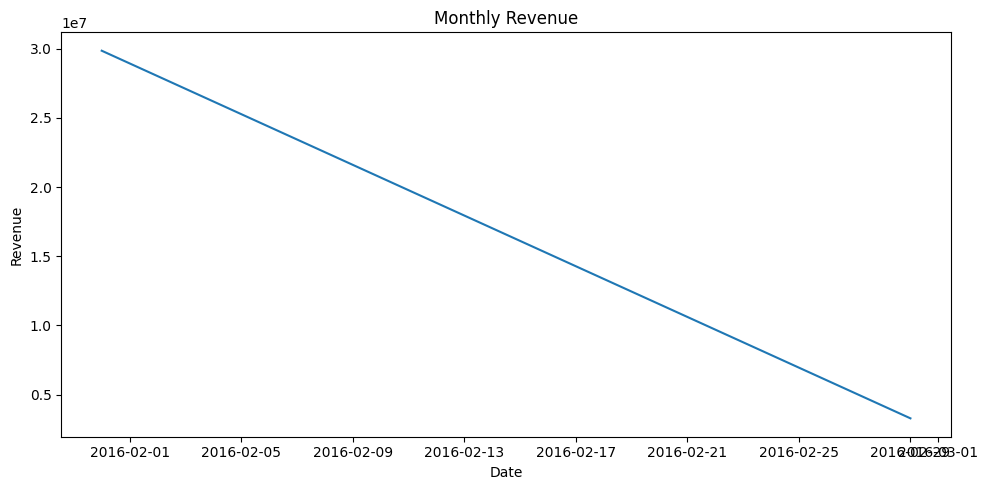


Top 10 SKUs by revenue:


,SKU,Description,total_qty,total_revenue,avg_price,n_transactions
5815,4261,CAPT MORGAN SPICED RUM,20226,444810.74,21.993047,1969
4874,3545,KETEL ONE VODKA,11883,357759.17,30.174105,1749
346,1233,JACK DANIELS NO 7 BLACK,9578,344712.22,35.990000,1803
7198,8068,ABSOLUT 80 PROOF,11189,288135.11,25.776631,1870
4718,3405,TITO'S HANDMADE VODKA,9203,275162.97,29.879714,1750
5325,3858,GREY GOOSE VODKA,9378,225014.22,24.001351,1762
3840,2589,JAMESON IRISH WHISKEY,4649,191669.51,41.584883,1407
5772,4227,BACARDI SUPERIOR RUM TRAV,10209,183659.91,17.990000,1699
589,1376,JIM BEAM,7362,169922.38,23.177941,1841
3835,2585,JAMESON IRISH WHISKEY,6940,164426.60,23.787695,1735


[SAVED] /content/outputs/sku_revenue_agg.csv

ABC class counts:
 ABC
C    4343
B    1813
A    1502
Name: count, dtype: int64
[SAVED] /content/outputs/sku_abc.csv


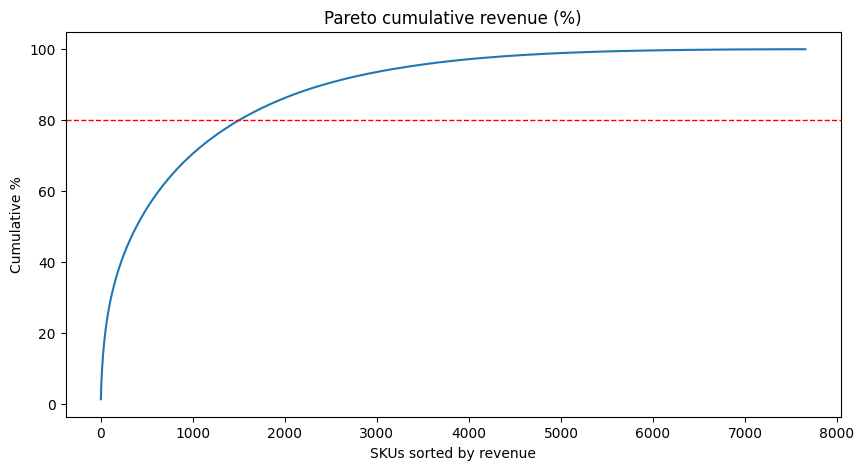

[SAVED] /content/outputs/sku_eoq.csv

EOQ sample:


,SKU,total_qty,annual_demand_units,unit_cost_est,holding_cost_H,EOQ_units,avg_order_qty
5815,4261,20226,123041.500000,21.993047,4.398609,3345,NaN
4874,3545,11883,72288.250000,30.174105,6.034821,2189,NaN
346,1233,9578,58266.166667,35.990000,7.198000,1799,NaN
7198,8068,11189,68066.416667,25.776631,5.155326,2298,NaN
4718,3405,9203,55984.916667,29.879714,5.975943,1936,NaN
5325,3858,9378,57049.500000,24.001351,4.800270,2180,NaN
3840,2589,4649,28281.416667,41.584883,8.316977,1166,NaN
5772,4227,10209,62104.750000,17.990000,3.598000,2628,NaN
589,1376,7362,44785.500000,23.177941,4.635588,1966,NaN
3835,2585,6940,42218.333333,23.787695,4.757539,1884,NaN


[SAVED] /content/outputs/sku_reorder_points.csv

Reorder point sample:


,SKU,avg_daily_demand,std_daily_demand,days_with_sales,EOQ_units,unit_cost_est,lead_time_days,safety_stock_units,reorder_point_units
7220,8111,475.733333,398.165491,60,18729,0.990000,7,1733,5063
1635,1892,385.350000,314.351516,60,16857,0.990000,7,1368,4065
5815,4261,337.100000,344.351747,60,3345,21.993047,7,1499,3859
4950,3606,320.000000,259.721950,60,15361,0.990000,7,1130,3370
6455,5111,306.850000,289.265805,60,15042,0.990000,7,1259,3407
5295,3837,234.283333,190.139654,60,13144,0.990000,7,827,2467
7420,8550,210.000000,0.000000,1,452,12.490000,7,0,1470
5648,4135,207.950000,165.620602,60,12383,0.990000,7,721,2177
6943,6650,206.292683,183.714622,41,3034,11.177964,7,800,2244
5677,4157,201.700000,152.934494,60,12195,0.990000,7,666,2078



[SUPPLIER ANALYSIS] inferred cols: VendorName None None Quantity
[SUPPLIER ANALYSIS] Not enough date columns to compute lead-times. Skipping detailed supplier KPIs.
[SAVED] /content/outputs/naive_forecasts_top_skus.csv

[FORECAST] Naive forecasts created for top SKUs (saved).
[INFO] LightGBM installed. Preparing feature-engineered dataset (skeleton).


,ds,y,dayofweek,month,lag_1,lag_7,rolling_7
55,2016-02-25,54,3,2,57.0,133.0,75.142857
56,2016-02-26,140,4,2,54.0,87.0,82.714286
57,2016-02-27,179,5,2,140.0,166.0,84.571429
58,2016-02-28,63,6,2,179.0,78.0,82.428571
59,2016-02-29,41,0,2,63.0,48.0,81.428571


[SAVED] /content/outputs/inventory_kpis.csv


,SKU,avg_daily_demand,std_daily_demand,lead_time_days,safety_stock_units,reorder_point_units,EOQ_units,annual_demand_units,days_on_hand_eoq,inventory_turns_eoq
0,100,1.000000,0.000000,7,0,7,23,42.583333,23.000000,1.851449
1,1000,1.812500,1.682013,7,7,20,145,176.416667,80.000000,1.216667
2,1001,18.955556,54.084091,7,235,368,1316,5189.083333,69.425557,3.943072
3,10021,3.160000,1.841195,7,8,30,282,480.583333,89.240506,1.704196
4,1003,4.500000,4.123106,7,18,50,99,109.500000,22.000000,1.106061
5,10030,2.600000,1.505545,7,7,25,190,158.166667,73.076923,0.832456
6,1004,2.470588,4.317373,7,19,36,186,255.500000,75.285714,1.373656
7,1005,6.086957,7.896064,7,34,77,312,1703.333333,51.257143,5.459402
8,10051,3.409091,3.361676,7,15,39,123,456.250000,36.080000,3.709350
9,10057,6.500000,7.778175,7,34,80,110,79.083333,16.923077,0.718939


[SAVED] /content/outputs/sku_abc_summary.csv
[SAVED] /content/outputs/sku_eoq_summary.csv
[SAVED] /content/outputs/sku_reorder_summary.csv
[SAVED] /content/outputs/topA_executive_summary.csv

[SAVED] Executive summaries and CSV outputs saved to: /content/outputs


In [32]:
# Full pipeline for Slooze take-home
import os
import warnings
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (10, 5)

CONFIG = {
    # file paths
    "sales_path": "/content/SalesFINAL12312016.csv",
    "purchases_path": "/content/PurchasesFINAL12312016.csv",
    "prices_2017_path": "/content/2017PurchasePricesDec.csv",
    "beg_inv_path": "/content/BegInvFINAL12312016.csv",
    "end_inv_path": "/content/EndInvFINAL12312016.csv",
    "invoice_purchases_path": "/content/InvoicePurchases12312016.csv",
    "default_order_cost": 200.0,
    "default_holding_rate": 0.2,
    "forecast_horizon_days": 90,
    "service_level": 0.95,
    "output_dir": "/content/outputs"
}

os.makedirs(CONFIG["output_dir"], exist_ok=True)


# UTILS
def try_read_csv(path, **kwargs):
    if not os.path.exists(path):
        print(f"[WARN] File not found: {path}")
        return None
    try:
        df = pd.read_csv(path, **kwargs)
        print(f"[LOAD] {path} -> shape {df.shape}")
        return df
    except Exception as e:
        print(f"[ERROR] reading {path}: {e}")
        return None


def safe_to_csv(df, name):
    path = os.path.join(CONFIG["output_dir"], f"{name}.csv")
    df.to_csv(path, index=False)
    print(f"[SAVED] {path}")


# 1) LOAD RAW FILES
sales = try_read_csv(CONFIG["sales_path"])
purchases = try_read_csv(CONFIG["purchases_path"])
prices_2017 = try_read_csv(CONFIG["prices_2017_path"])
beg_inventory = try_read_csv(CONFIG["beg_inv_path"])
end_inventory = try_read_csv(CONFIG["end_inv_path"])
invoice_purchases = try_read_csv(CONFIG["invoice_purchases_path"])




def clean_sales_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]

    df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce', infer_datetime_format=True, dayfirst=False)

    numeric_cols = ['SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'ExciseTax']
    for c in numeric_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

    if 'SalesDollars' in df.columns:
        df['Revenue'] = df['SalesDollars']
    else:
        df['Revenue'] = df['SalesQuantity'] * df['SalesPrice']


    if 'Brand' in df.columns:
        df['SKU'] = df['Brand'].astype(str)
    else:
        df['SKU'] = df['InventoryId'].astype(str)

    # Clean Description and VendorName
    if 'Description' in df.columns:
        df['Description'] = df['Description'].astype(str).str.strip().str.upper()
    if 'VendorName' in df.columns:
        df['VendorName'] = df['VendorName'].astype(str).str.strip().str.upper()

    # Drop rows with missing SalesDate or SalesQuantity
    df = df.dropna(subset=['SalesDate', 'SalesQuantity'])

    # Reset index
    df = df.reset_index(drop=True)
    return df


if sales is None:
    raise RuntimeError("Sales file not loaded; cannot continue.")
sales = clean_sales_df(sales)
print("[CLEAN] sales sample:")
display(sales.head(5))
safe_to_csv(sales, "sales_cleaned_sample")

# 3) BASIC EDA SUMMARY
print("\n=== EDA SUMMARY ===")
print("Time range:", sales['SalesDate'].min(), "to", sales['SalesDate'].max())
print("Unique SKUs:", sales['SKU'].nunique())
print("Unique Stores:", sales['Store'].nunique())
print("Top vendors:", sales['VendorName'].value_counts().head(10))

# Quick aggregates
daily_rev = sales.groupby('SalesDate').agg({'Revenue': 'sum'}).rename(columns={'Revenue': 'DailyRevenue'}).reset_index()
monthly_rev = sales.resample('M', on='SalesDate').agg({'Revenue': 'sum'}).rename(columns={'Revenue': 'MonthlyRevenue'}).reset_index()

print("Total revenue (dataset):", sales['Revenue'].sum())
safe_to_csv(daily_rev, "daily_revenue")
safe_to_csv(monthly_rev, "monthly_revenue")

# Visual: monthly revenue
sns.lineplot(data=monthly_rev, x='SalesDate', y='MonthlyRevenue')
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Top SKUs by revenue and quantity
sku_agg = sales.groupby(['SKU', 'Description']).agg(
    total_qty=('SalesQuantity', 'sum'),
    total_revenue=('Revenue', 'sum'),
    avg_price=('SalesPrice', 'mean'),
    n_transactions=('InventoryId', 'count')
).reset_index().sort_values('total_revenue', ascending=False)

print("\nTop 10 SKUs by revenue:")
display(sku_agg.head(10))
safe_to_csv(sku_agg.head(5000), "sku_revenue_agg")   # save top-5000 SKUs summary

# 4) ABC ANALYSIS (by revenue)
def abc_classification(df_agg, value_col='total_revenue', a_threshold=0.8, b_threshold=0.95):
    df = df_agg.copy().sort_values(value_col, ascending=False).reset_index(drop=True)
    df['cum_value'] = df[value_col].cumsum()
    total = df[value_col].sum()
    df['cum_perc'] = df['cum_value'] / total
    def label(p):
        if p <= a_threshold:
            return 'A'
        elif p <= b_threshold:
            return 'B'
        else:
            return 'C'
    df['ABC'] = df['cum_perc'].apply(label)
    return df

sku_abc = abc_classification(sku_agg, value_col='total_revenue')
sku_abc_counts = sku_abc['ABC'].value_counts()
print("\nABC class counts:\n", sku_abc_counts)
safe_to_csv(sku_abc, "sku_abc")

# Visual: Pareto
sku_abc['cum_perc'] = sku_abc['cum_perc'] * 100
plt.plot(sku_abc['cum_perc'].values)
plt.title("Pareto cumulative revenue (%)")
plt.ylabel("Cumulative %")
plt.xlabel("SKUs sorted by revenue")
plt.axhline(80, color='red', linestyle='--', linewidth=1)
plt.show()


# 5) EOQ (Economic Order Quantity)
sales_range_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days + 1
sales_range_days = max(sales_range_days, 1)
sales_range_days

sku_annual = sku_agg.copy()
# annual demand = total_qty * (365 / observed_days)
sku_annual['annual_demand_units'] = sku_annual['total_qty'] * (365.0 / sales_range_days)

def estimate_unit_cost(row):
    if prices_2017 is not None and 'Brand' in prices_2017.columns and 'UnitCost' in prices_2017.columns:
        match = prices_2017[prices_2017['Brand'].astype(str) == str(row['SKU'])]
        if not match.empty:
            return float(match['UnitCost'].iloc[0])
    return float(row['avg_price'] if not np.isnan(row['avg_price']) else 0.0)

sku_annual['unit_cost_est'] = sku_annual.apply(estimate_unit_cost, axis=1)

def compute_eoq(D, S, H):
    # EOQ = sqrt(2*D*S / H)
    # If H == 0, return NaN
    if H <= 0:
        return np.nan
    return np.sqrt((2.0 * D * S) / H)

S_default = CONFIG['default_order_cost']
holding_rate = CONFIG['default_holding_rate']

sku_annual['order_cost_S'] = S_default
sku_annual['holding_cost_H'] = sku_annual['unit_cost_est'] * holding_rate
sku_annual['EOQ_units'] = sku_annual.apply(lambda r: compute_eoq(r['annual_demand_units'], r['order_cost_S'], r['holding_cost_H']), axis=1)

# Round EOQ to integers and handle low-demand products
sku_annual['EOQ_units'] = sku_annual['EOQ_units'].fillna(0).apply(lambda x: int(np.round(x)) if x>0 else 0)

if invoice_purchases is not None:
    id_col = None
    qty_col = None
    for c in invoice_purchases.columns:
        if 'brand' in c.lower() or 'product' in c.lower() or 'sku' in c.lower():
            id_col = c
        if 'qty' in c.lower() or 'quantity' in c.lower():
            qty_col = c
    if id_col is not None and qty_col is not None:
        ip = invoice_purchases.copy()
        ip[id_col] = ip[id_col].astype(str)
        ip_agg = ip.groupby(id_col)[qty_col].mean().reset_index().rename(columns={id_col:'SKU', qty_col:'avg_order_qty'})
        sku_annual = sku_annual.merge(ip_agg, on='SKU', how='left')
    else:
        sku_annual['avg_order_qty'] = np.nan
else:
    sku_annual['avg_order_qty'] = np.nan

safe_to_csv(sku_annual, "sku_eoq")

print("\nEOQ sample:")
display(sku_annual[['SKU','total_qty','annual_demand_units','unit_cost_est','holding_cost_H','EOQ_units','avg_order_qty']].head(10))


# 6) REORDER POINT & SAFETY STOCK
# ROP = avg_daily_demand * lead_time + safety_stock
# safety_stock = z * sigma_daily * sqrt(lead_time)
service_level = CONFIG['service_level']
z = norm.ppf(service_level)

daily_sku = sales.groupby(['SKU','SalesDate']).agg(daily_qty=('SalesQuantity','sum')).reset_index()
sku_stats = daily_sku.groupby('SKU').agg(
    avg_daily_demand=('daily_qty','mean'),
    std_daily_demand=('daily_qty','std'),
    days_with_sales=('SalesDate','nunique')
).reset_index()

sku_stats['std_daily_demand'] = sku_stats['std_daily_demand'].fillna(0.0)
sku_stats = sku_stats.merge(sku_annual[['SKU','EOQ_units','unit_cost_est']], on='SKU', how='left')

def estimate_lead_time_days(sku):
    if invoice_purchases is None and purchases is None:
        return 7  # default lead time
    df = invoice_purchases if invoice_purchases is not None else purchases
    df_cols_lower = [c.lower() for c in df.columns]
    order_col = None
    recv_col = None
    sku_col = None
    for c in df.columns:
        lc = c.lower()
        if 'order' in lc and 'date' in lc:
            order_col = c
        if ('receive' in lc or 'received' in lc or 'delivery' in lc or 'delivered' in lc or 'receipt' in lc) and 'date' in lc:
            recv_col = c
        if 'brand' in lc or 'sku' in lc or 'product' in lc:
            sku_col = c
    if sku_col is None or (order_col is None and recv_col is None):
        return 7
    tmp = df[[sku_col, order_col if order_col in df.columns else sku_col, recv_col if recv_col in df.columns else sku_col]].copy() if (order_col in df.columns or recv_col in df.columns) else None
    try:
        if order_col in df.columns:
            tmp[order_col] = pd.to_datetime(df[order_col], errors='coerce', infer_datetime_format=True)
        if recv_col in df.columns:
            tmp[recv_col] = pd.to_datetime(df[recv_col], errors='coerce', infer_datetime_format=True)
        tmp = tmp[tmp[sku_col].astype(str) == str(sku)]
        tmp = tmp.dropna(subset=[order_col, recv_col]) if (order_col in tmp.columns and recv_col in tmp.columns) else tmp
        if tmp is None or tmp.empty:
            return 7
        tmp['lead_days'] = (tmp[recv_col] - tmp[order_col]).dt.days
        median_lead = int(tmp['lead_days'].median()) if 'lead_days' in tmp.columns and not tmp['lead_days'].isna().all() else 7
        if np.isnan(median_lead):
            return 7
        return max(1, median_lead)
    except Exception:
        return 7

top_skus_to_estimate = sku_stats.sort_values('avg_daily_demand', ascending=False).head(500)['SKU'].tolist()
lead_time_map = {}
for sku in top_skus_to_estimate:
    lead_days = estimate_lead_time_days(sku)
    lead_time_map[sku] = lead_days

default_lead = int(np.median(list(lead_time_map.values())) if lead_time_map else 7)

sku_stats['lead_time_days'] = sku_stats['SKU'].apply(lambda s: lead_time_map.get(s, default_lead))

sku_stats['safety_stock_units'] = sku_stats.apply(
    lambda r: z * r['std_daily_demand'] * np.sqrt(max(1, r['lead_time_days'])), axis=1
).round().astype(int)

sku_stats['reorder_point_units'] = (sku_stats['avg_daily_demand'] * sku_stats['lead_time_days'] + sku_stats['safety_stock_units']).round().astype(int)

safe_to_csv(sku_stats, "sku_reorder_points")

print("\nReorder point sample:")
display(sku_stats.sort_values('avg_daily_demand', ascending=False).head(10))

# 7) SUPPLIER & LEAD TIME ANALYSIS
if purchases is not None or invoice_purchases is not None:
    df_pur = invoice_purchases if invoice_purchases is not None else purchases
    # normalize columns
    df = df_pur.copy()
    df.columns = [c.strip() for c in df.columns]
    supplier_col = None
    order_date_col = None
    recv_date_col = None
    qty_col = None
    for c in df.columns:
        lc = c.lower()
        if 'vendor' in lc or 'supplier' in lc or 'vendorname' in lc:
            supplier_col = c
        if 'order' in lc and 'date' in lc:
            order_date_col = c
        if ('receive' in lc or 'received' in lc or 'delivery' in lc or 'delivered' in lc or 'receipt' in lc) and 'date' in lc:
            recv_date_col = c
        if 'qty' in lc or 'quantity' in lc:
            qty_col = c
    if supplier_col is None:
        for c in df.columns:
            if 'vendor' in c.lower() or 'supplier' in c.lower():
                supplier_col = c
    if order_date_col is None:
        for c in df.columns:
            if 'date' in c.lower() and 'order' in c.lower():
                order_date_col = c
    if recv_date_col is None:
        for c in df.columns:
            if 'date' in c.lower() and ('receive' in c.lower() or 'deliv' in c.lower()):
                recv_date_col = c

    print("\n[SUPPLIER ANALYSIS] inferred cols:", supplier_col, order_date_col, recv_date_col, qty_col)

    if order_date_col in df.columns:
        df[order_date_col] = pd.to_datetime(df[order_date_col], errors='coerce', infer_datetime_format=True)
    if recv_date_col in df.columns:
        df[recv_date_col] = pd.to_datetime(df[recv_date_col], errors='coerce', infer_datetime_format=True)

    # lead time
    if (order_date_col in df.columns) and (recv_date_col in df.columns):
        df['lead_days'] = (df[recv_date_col] - df[order_date_col]).dt.days.clip(lower=0)
        supplier_kpis = df.groupby(supplier_col).agg(
            avg_lead_days=('lead_days','median'),
            lead_days_std=('lead_days','std'),
            orders_count=('lead_days','count')
        ).reset_index().sort_values('avg_lead_days')
        display(supplier_kpis.head(20))
        safe_to_csv(supplier_kpis, "supplier_kpis")
    else:
        print("[SUPPLIER ANALYSIS] Not enough date columns to compute lead-times. Skipping detailed supplier KPIs.")
else:
    print("[SUPPLIER ANALYSIS] No purchase/invoice dataset available.")


# 8) FORECASTING PREP / SIMPLE BASELINE
forecast_horizon = CONFIG['forecast_horizon_days']
top_skus = sku_agg.head(50)['SKU'].tolist()

def make_daily_series_for_sku(sku):
    s = sales[sales['SKU'] == sku].groupby('SalesDate').agg(daily_qty=('SalesQuantity','sum')).sort_index()
    full_idx = pd.date_range(sales['SalesDate'].min(), sales['SalesDate'].max(), freq='D')
    s = s.reindex(full_idx, fill_value=0)
    s.index.name = 'ds'
    s = s.reset_index().rename(columns={'daily_qty':'y'})
    return s

forecasts = []
for sku in top_skus:
    ts = make_daily_series_for_sku(sku)
    ts['ma7'] = ts['y'].rolling(7, min_periods=1).mean()
    last_ma7 = ts['ma7'].iloc[-1]
    future_dates = pd.date_range(ts['ds'].max() + pd.Timedelta(days=1), periods=forecast_horizon)
    forecast_df = pd.DataFrame({'ds': future_dates, 'yhat_naive': last_ma7, 'SKU': sku})
    forecasts.append(forecast_df)
forecast_df_all = pd.concat(forecasts, ignore_index=True)
safe_to_csv(forecast_df_all, "naive_forecasts_top_skus")
print("\n[FORECAST] Naive forecasts created for top SKUs (saved).")

try:
    import lightgbm as lgb
    LGB_INSTALLED = True
except Exception:
    LGB_INSTALLED = False

if LGB_INSTALLED:
    print("[INFO] LightGBM installed. Preparing feature-engineered dataset (skeleton).")
    sku_example = top_skus[0]
    ts = make_daily_series_for_sku(sku_example)
    ts['dayofweek'] = ts['ds'].dt.dayofweek
    ts['month'] = ts['ds'].dt.month
    ts['lag_1'] = ts['y'].shift(1).fillna(0)
    ts['lag_7'] = ts['y'].shift(7).fillna(0)
    ts['rolling_7'] = ts['y'].rolling(7, min_periods=1).mean()
    display(ts.tail())
else:
    print("[INFO] LightGBM not installed; skipping ML forecasting skeleton. To enable: pip install lightgbm")

# 9) INVENTORY KPIs & OUTPUTS
inv_kpis = sku_stats[['SKU','avg_daily_demand','std_daily_demand','lead_time_days','safety_stock_units','reorder_point_units']].merge(
    sku_annual[['SKU','EOQ_units','annual_demand_units']], on='SKU', how='left'
)
inv_kpis['days_on_hand_eoq'] = inv_kpis.apply(lambda r: (r['EOQ_units'] / r['avg_daily_demand']) if r['avg_daily_demand']>0 else np.nan, axis=1)
inv_kpis['inventory_turns_eoq'] = inv_kpis.apply(lambda r: (r['annual_demand_units'] / r['EOQ_units']) if r['EOQ_units']>0 else np.nan, axis=1)

safe_to_csv(inv_kpis, "inventory_kpis")
display(inv_kpis.head(10))

# 10) SUMMARY REPORTS (save)
safe_to_csv(sku_abc[['SKU','Description','total_qty','total_revenue','ABC']], "sku_abc_summary")
safe_to_csv(sku_annual[['SKU','annual_demand_units','unit_cost_est','order_cost_S','holding_cost_H','EOQ_units']], "sku_eoq_summary")
safe_to_csv(sku_stats[['SKU','avg_daily_demand','std_daily_demand','lead_time_days','safety_stock_units','reorder_point_units']], "sku_reorder_summary")

topA = sku_abc[sku_abc['ABC']=='A'].head(100).merge(
    sku_annual[['SKU','annual_demand_units','EOQ_units','unit_cost_est']], on='SKU', how='left'
).merge(
    sku_stats[['SKU','avg_daily_demand','reorder_point_units']], on='SKU', how='left'
)
safe_to_csv(topA, "topA_executive_summary")
print("\n[SAVED] Executive summaries and CSV outputs saved to:", CONFIG['output_dir'])




NEW CODE

Prophet Model Implementation

In [31]:

import sys
import subprocess
import pkgutil

def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# Install common libs
for pkg in ["pandas","numpy","matplotlib","seaborn","scipy","statsmodels","lightgbm","jupyter","jupyterlab","scikit-learn"]:
    if not pkgutil.find_loader(pkg):
        pip_install(pkg)

# Try installing prophet (fbprophet -> prophet new name)
try:
    import prophet
except Exception:
    try:
        pip_install("prophet")
    except Exception:
        print("[WARN] prophet install failed or not available. We'll fallback to statsmodels ARIMA.")

# Croston isn't a pip package; we'll implement inline.

# %% [markdown]
# ## 1. Configuration - update paths if necessary

# %%
import os
from datetime import timedelta
import numpy as np
import pandas as pd

CONFIG = {
    "sales_path": "/content/SalesFINAL12312016.csv",
    "purchases_path": "/content/PurchasesFINAL12312016.csv",          # may be None
    "prices_2017_path": "/content/2017PurchasePricesDec.csv",        # may be None
    "beg_inv_path": "/content/BegInvFINAL12312016.csv",              # may be None
    "end_inv_path": "/content/EndInvFINAL12312016.csv",              # may be None
    "invoice_purchases_path": "/content/InvoicePurchases12312016.csv", # may be None
    "output_dir": "/content/outputs",
    "src_dir": "/content/src",
    "default_order_cost": 200.0,   # S
    "default_holding_rate": 0.2,   # H rate (fraction of unit cost/year)
    "service_level": 0.95,         # safety stock target
    "forecast_horizon_days": 90,
    "top_skus_for_models": 50      # number of top SKUs to build models for
}

os.makedirs(CONFIG["output_dir"], exist_ok=True)
os.makedirs(CONFIG["src_dir"], exist_ok=True)

# %% [markdown]
# ## 2. Utilities & write `src` helper module
# We'll write reusable functions into `/content/src/inventory_utils.py` so you can import them later.

# %%
src_code = r'''
# inventory_utils.py
import os
import numpy as np
import pandas as pd
from scipy.stats import norm

def eoq(D, S, H):
    """Compute Economic Order Quantity."""
    if H <= 0:
        return np.nan
    return np.sqrt((2.0 * D * S) / H)

def safety_stock(sigma_daily, lead_time_days, service_level=0.95):
    z = norm.ppf(service_level)
    return z * sigma_daily * np.sqrt(max(1, lead_time_days))

def reorder_point(avg_daily, lead_time_days, sigma_daily, service_level=0.95):
    ss = safety_stock(sigma_daily, lead_time_days, service_level)
    return avg_daily * lead_time_days + ss

def abc_classification(df, value_col='total_revenue', a_threshold=0.8, b_threshold=0.95):
    df = df.copy().sort_values(value_col, ascending=False).reset_index(drop=True)
    df['cum_value'] = df[value_col].cumsum()
    total = df[value_col].sum()
    df['cum_perc'] = df['cum_value'] / total
    def label(p):
        if p <= a_threshold:
            return 'A'
        elif p <= b_threshold:
            return 'B'
        else:
            return 'C'
    df['ABC'] = df['cum_perc'].apply(label)
    return df
'''
with open(os.path.join(CONFIG["src_dir"], "inventory_utils.py"), "w") as f:
    f.write(src_code)
print("[INFO] Wrote src/inventory_utils.py")

# make sure src dir is importable
import sys
if CONFIG["src_dir"] not in sys.path:
    sys.path.append(CONFIG["src_dir"])

# import the helpers
from inventory_utils import eoq, safety_stock, reorder_point, abc_classification

# %% [markdown]
# ## 3. Load raw CSVs
# Load only files that exist. If a file is missing we'll continue with available ones.

# %%
def try_read(path):
    if path is None:
        return None
    if not os.path.exists(path):
        print(f"[WARN] Not found: {path}")
        return None
    return pd.read_csv(path)

sales = try_read(CONFIG["sales_path"])
purchases = try_read(CONFIG["purchases_path"])
prices_2017 = try_read(CONFIG["prices_2017_path"])
beg_inventory = try_read(CONFIG["beg_inv_path"])
end_inventory = try_read(CONFIG["end_inv_path"])
invoice_purchases = try_read(CONFIG["invoice_purchases_path"])

if sales is None:
    raise RuntimeError("sales file is required. Update CONFIG['sales_path'] with correct path.")

print("Loaded files summary:")
for name, df in [("sales",sales),("purchases",purchases),("prices_2017",prices_2017),("beg_inventory",beg_inventory),("end_inventory",end_inventory),("invoice_purchases",invoice_purchases)]:
    print(name, ":", None if df is None else df.shape)

# %% [markdown]
# ## 4. Clean & standardize `sales` table
# Normalize column names, parse dates, derive SKU, revenue.

# %%
def clean_sales(df):
    df = df.copy()
    # strip column names
    df.columns = [c.strip() for c in df.columns]
    # parse date
    df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce', infer_datetime_format=True, dayfirst=False)
    # numeric conversions
    for c in ['SalesQuantity','SalesDollars','SalesPrice','Volume','ExciseTax']:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    # revenue
    if 'SalesDollars' in df.columns:
        df['Revenue'] = df['SalesDollars']
    else:
        df['Revenue'] = df['SalesQuantity'] * df.get('SalesPrice', 0)
    # SKU
    if 'Brand' in df.columns:
        df['SKU'] = df['Brand'].astype(str)
    else:
        df['SKU'] = df['InventoryId'].astype(str)
    # clean text
    if 'Description' in df.columns:
        df['Description'] = df['Description'].astype(str).str.strip()
    df = df.dropna(subset=['SalesDate','SalesQuantity'])
    return df

sales = clean_sales(sales)
print("Sales cleaned:", sales.shape)
sales.head(3)

# %% [markdown]
# ## 5. EDA & Aggregations
# - time range, uniques
# - daily/monthly aggregates
# - top SKUs

# %%
print("Time range:", sales['SalesDate'].min(), "->", sales['SalesDate'].max())
print("Unique SKUs:", sales['SKU'].nunique(), "Unique stores:", sales['Store'].nunique())

daily_rev = sales.groupby('SalesDate').agg(DailyRevenue=('Revenue','sum')).reset_index()
monthly_rev = sales.resample('M', on='SalesDate').agg(MonthlyRevenue=('Revenue','sum')).reset_index()

sku_agg = sales.groupby(['SKU','Description']).agg(
    total_qty=('SalesQuantity','sum'),
    total_revenue=('Revenue','sum'),
    avg_price=('SalesPrice','mean'),
    n_transactions=('InventoryId','count')
).reset_index().sort_values('total_revenue', ascending=False)

sku_agg.head(10)

# %% [markdown]
# ## 6. ABC Analysis (by revenue)
# Use Pareto thresholds (A=top ~80% revenue, B next ~15%, C rest). Save output.

# %%
sku_abc = abc_classification(sku_agg, value_col='total_revenue', a_threshold=0.8, b_threshold=0.95)
sku_abc['cum_perc'] = sku_abc['cum_perc']*100
sku_abc.head(10)
sku_abc.to_csv(os.path.join(CONFIG['output_dir'],'sku_abc.csv'), index=False)
print("[SAVED] sku_abc.csv")

# %% [markdown]
# ## 7. EOQ (with tunable S & H)
# - Estimate annual demand per SKU using observed window
# - Estimate unit cost from `prices_2017` if available; else use avg sales price as proxy
# - Compute EOQ using eoq(D,S,H)

# %%
# observed days
obs_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days + 1
obs_days = max(obs_days,1)

sku_annual = sku_agg.copy()
sku_annual['annual_demand_units'] = sku_annual['total_qty'] * (365.0 / obs_days)

# attempt to get unit cost from prices_2017 using Brand/SKU column names if available
def get_unit_cost_proxy(row):
    if prices_2017 is not None:
        # try match by brand/sku columns - flexible check
        for col in prices_2017.columns:
            if 'brand' in col.lower() or 'sku' in col.lower() or 'product' in col.lower():
                match_col = col
                break
        else:
            match_col = None
        # price column heuristics
        price_col = None
        for c in prices_2017.columns:
            if 'cost' in c.lower() or 'price' in c.lower():
                price_col = c
                break
        if match_col is not None and price_col is not None:
            m = prices_2017[prices_2017[match_col].astype(str) == str(row['SKU'])]
            if not m.empty:
                try:
                    return float(m[price_col].iloc[0])
                except:
                    pass
    # fallback
    return float(row['avg_price'] if not np.isnan(row['avg_price']) else 0.0)

sku_annual['unit_cost'] = sku_annual.apply(get_unit_cost_proxy, axis=1)
sku_annual['order_cost_S'] = CONFIG['default_order_cost']
sku_annual['holding_cost_H'] = sku_annual['unit_cost'] * CONFIG['default_holding_rate']
# compute EOQ
sku_annual['EOQ'] = sku_annual.apply(lambda r: int(round(eoq(r['annual_demand_units'], r['order_cost_S'], r['holding_cost_H']))) if r['holding_cost_H']>0 else 0, axis=1)

sku_annual[['SKU','annual_demand_units','unit_cost','EOQ']].head(10)
sku_annual.to_csv(os.path.join(CONFIG['output_dir'],'sku_eoq.csv'), index=False)
print("[SAVED] sku_eoq.csv")

# %% [markdown]
# ## 8. Reorder Point & Safety Stock
# - compute avg_daily and std_daily per SKU
# - estimate lead time using invoice_purchases/purchases if available otherwise default
# - compute safety stock and ROP

# %%
# daily demand per SKU
daily_sku = sales.groupby(['SKU','SalesDate']).agg(daily_qty=('SalesQuantity','sum')).reset_index()
sku_stats = daily_sku.groupby('SKU').agg(
    avg_daily=('daily_qty','mean'),
    std_daily=('daily_qty','std'),
    sales_days=('SalesDate','nunique')
).reset_index().fillna(0.0)

sku_stats = sku_stats.merge(sku_annual[['SKU','EOQ','annual_demand_units']], on='SKU', how='left')

# estimate lead times (heuristic)
def estimate_lead_for_sku(sku, invoice_purchases, purchases):
    # If invoice_purchases has order_date & receive_date, compute median lead time
    df = invoice_purchases if invoice_purchases is not None else purchases
    if df is None:
        return 7
    # find candidate columns
    cols = {c.lower():c for c in df.columns}
    order_col = None
    recv_col = None
    sku_col = None
    for k,c in cols.items():
        if 'order' in k and 'date' in k:
            order_col = c
        if ('receive' in k or 'deliv' in k or 'received' in k) and 'date' in k:
            recv_col = c
        if 'brand' in k or 'sku' in k or 'product' in k:
            sku_col = c
    if sku_col is None:
        # fallback: maybe vendor sku mapping not present
        return 7
    if order_col is None or recv_col is None:
        return 7
    tmp = df[[sku_col,order_col,recv_col]].copy()
    tmp[order_col] = pd.to_datetime(tmp[order_col], errors='coerce', infer_datetime_format=True)
    tmp[recv_col] = pd.to_datetime(tmp[recv_col], errors='coerce', infer_datetime_format=True)
    tmp = tmp[tmp[sku_col].astype(str)==str(sku)]
    tmp = tmp.dropna(subset=[order_col,recv_col])
    if tmp.empty:
        return 7
    tmp['lead'] = (tmp[recv_col] - tmp[order_col]).dt.days
    med = int(tmp['lead'].median()) if not tmp['lead'].isna().all() else 7
    return max(1, med)

# compute lead for top N SKUs, default 7 days else median
top_for_lead = sku_stats.sort_values('avg_daily', ascending=False).head(500)['SKU'].tolist()
lead_map = {}
for sku in top_for_lead:
    lead_map[sku] = estimate_lead_for_sku(sku, invoice_purchases, purchases)
default_lead = int(np.median(list(lead_map.values())) if lead_map else 7)

sku_stats['lead_time_days'] = sku_stats['SKU'].apply(lambda s: lead_map.get(s, default_lead))
# safety stock and ROP
z = norm.ppf(CONFIG['service_level'])
sku_stats['safety_stock'] = (sku_stats['std_daily'] * np.sqrt(sku_stats['lead_time_days']) * z).round().astype(int)
sku_stats['reorder_point'] = (sku_stats['avg_daily'] * sku_stats['lead_time_days'] + sku_stats['safety_stock']).round().astype(int)

sku_stats[['SKU','avg_daily','std_daily','lead_time_days','safety_stock','reorder_point']].head(10)
sku_stats.to_csv(os.path.join(CONFIG['output_dir'],'sku_reorder_points.csv'), index=False)
print("[SAVED] sku_reorder_points.csv")

# %% [markdown]
# ## 9. Supplier / PO analysis: lead time distribution, fill rate & stockout simulation
# - compute lead times (if PO data exists)
# - compute fill rate per PO and aggregated per Vendor
# - simulate stockouts using historical demand and current ROP

# %%
if invoice_purchases is not None or purchases is not None:
    dfpo = invoice_purchases if invoice_purchases is not None else purchases
    # normalize cols
    dfpo.columns = [c.strip() for c in dfpo.columns]
    print("[INFO] PO columns:", dfpo.columns.tolist()[:30])
    # identify useful columns heuristically
    sku_col = None
    order_col = None
    recv_col = None
    qty_ord_col = None
    qty_rec_col = None
    vendor_col = None
    for c in dfpo.columns:
        lc = c.lower()
        if 'brand' in lc or 'sku' in lc or 'product' in lc:
            sku_col = sku_col or c
        if 'order' in lc and 'date' in lc:
            order_col = order_col or c
        if ('receive' in lc or 'deliv' in lc or 'received' in lc) and 'date' in lc:
            recv_col = recv_col or c
        if 'qty' in lc and ('rec' in lc or 'received' in lc):
            qty_rec_col = qty_rec_col or c
        if 'qty' in lc and ('ord' in lc or 'order' in lc):
            qty_ord_col = qty_ord_col or c
        if 'vendor' in lc or 'supplier' in lc or 'vendorname' in lc:
            vendor_col = vendor_col or c

    print("Inferred PO cols:", sku_col, order_col, recv_col, qty_ord_col, qty_rec_col, vendor_col)

    # compute lead days when possible
    if order_col and recv_col:
        dfpo[order_col] = pd.to_datetime(dfpo[order_col], errors='coerce')
        dfpo[recv_col] = pd.to_datetime(dfpo[recv_col], errors='coerce')
        dfpo['lead_days'] = (dfpo[recv_col] - dfpo[order_col]).dt.days.clip(lower=0)
        vendor_kpis = dfpo.groupby(vendor_col).agg(med_lead=('lead_days','median'), std_lead=('lead_days','std'), orders=('lead_days','count')).reset_index().sort_values('med_lead')
        vendor_kpis.to_csv(os.path.join(CONFIG['output_dir'],'vendor_lead_kpis.csv'), index=False)
        print("[SAVED] vendor_lead_kpis.csv")
    else:
        print("[WARN] Not enough PO date fields to compute lead days.")

    # Fill rate: qty received / qty ordered when columns exist
    if qty_ord_col and qty_rec_col:
        dfpo[qty_ord_col] = pd.to_numeric(dfpo[qty_ord_col], errors='coerce').fillna(0)
        dfpo[qty_rec_col] = pd.to_numeric(dfpo[qty_rec_col], errors='coerce').fillna(0)
        dfpo['fill_rate'] = dfpo[qty_rec_col] / dfpo[qty_ord_col].replace({0:np.nan})
        fill_by_vendor = dfpo.groupby(vendor_col).agg(fill_rate_med=('fill_rate','median'), fill_rate_mean=('fill_rate','mean')).reset_index()
        fill_by_vendor.to_csv(os.path.join(CONFIG['output_dir'],'vendor_fill_rate.csv'), index=False)
        print("[SAVED] vendor_fill_rate.csv")
    else:
        print("[WARN] Not enough PO qty fields to compute fill rate.")
else:
    print("[WARN] No purchases or invoice_purchases dataset found; skipping PO analysis.")

# %% [markdown]
# ## 10. Croston method for intermittent demand (function + usage)
# Croston separates demand into demand sizes and intervals; good for slow-moving/skewed SKUs.

# %%
def croston(ts, alpha=0.4, n_forecast=1):
    """
    Croston's method for intermittent demand forecasting.
    ts: array-like of demand series (non-negative ints)
    returns forecast for next n_forecast periods (constant)
    """
    import numpy as np
    x = np.asarray(ts)
    # remove leading zeros - algorithm expects series
    # but we keep zeros: implementation works with entire series
    z = np.where(x>0, 1, 0)
    demand = x.copy()
    if demand.sum() == 0:
        return 0.0
    # initialize
    first_occ = np.argmax(demand>0)
    q = demand[first_occ]
    p = first_occ + 1  # interval from start
    # initialize estimates
    q_hat = q
    p_hat = p
    # iterate
    idx = first_occ + 1
    last_d = q
    last_i = p
    while idx < len(demand):
        if demand[idx] > 0:
            # update q_hat and p_hat
            q_hat = alpha * demand[idx] + (1-alpha)*q_hat
            p_hat = alpha * (idx - last_i) + (1-alpha)*p_hat
            last_i = idx
        idx += 1
    # croston forecast
    return q_hat / p_hat

# Example: apply croston to low-frequency SKUs (we'll detect low-demand SKUs)
# Identify intermittent SKUs: fraction of zeros high or avg_daily < threshold
daily_pivot = daily_sku.pivot(index='SalesDate', columns='SKU', values='daily_qty').fillna(0)
intermittent_skus = []
for sku in daily_pivot.columns:
    ser = daily_pivot[sku].values
    zero_frac = (ser==0).mean()
    if zero_frac > 0.8:  # >80% zeros -> intermittent
        intermittent_skus.append(sku)
len(intermittent_skus), "intermittent sample:", intermittent_skus[:10]

# run croston for top 20 intermittent SKUs
croston_forecasts = []
for sku in intermittent_skus[:20]:
    ser = daily_pivot[sku].values
    f = croston(ser, alpha=0.3, n_forecast=CONFIG['forecast_horizon_days'])
    croston_forecasts.append({'SKU':sku, 'croston_daily_forecast': float(f)})
pd.DataFrame(croston_forecasts).to_csv(os.path.join(CONFIG['output_dir'],'croston_forecasts_sample.csv'), index=False)
print("[SAVED] croston_forecasts_sample.csv")

# %% [markdown]
# ## 11. Per-SKU Forecasting (Prophet or SARIMAX fallback)
# - We'll train Prophet for top SKUs if available, otherwise use statsmodels SARIMAX
# - Limit to top N SKUs to save time

# %%
# pick top SKUs by revenue
top_k = CONFIG['top_skus_for_models']
top_skus = sku_agg.head(top_k)['SKU'].tolist()

# helper to get daily series
def make_daily_series(sales_df, sku):
    s = sales_df[sales_df['SKU']==sku].groupby('SalesDate').agg(y=('SalesQuantity','sum')).reindex(
        pd.date_range(sales_df['SalesDate'].min(), sales_df['SalesDate'].max(), freq='D'), fill_value=0)
    s = s.reset_index().rename(columns={'index':'ds','y':'y'})
    return s

# try prophet
use_prophet = False
try:
    from prophet import Prophet
    use_prophet = True
    print("[INFO] prophet available. Will use Prophet for forecasting.")
except Exception:
    print("[INFO] prophet not available; will use SARIMAX backup.")

from statsmodels.tsa.statespace.sarimax import SARIMAX

model_results = {}
forecast_h = CONFIG['forecast_horizon_days']

for sku in top_skus[:10]:   # limit to first 10 to keep runtime reasonable
    ts = make_daily_series(sales, sku)
    # if intermittent (many zeros) use Croston
    zero_frac = (ts['y']==0).mean()
    if zero_frac > 0.8:
        f = croston(ts['y'].values, alpha=0.3)
        # constant daily forecast
        fc_values = [f]*forecast_h
        future_dates = pd.date_range(ts['ds'].max()+pd.Timedelta(days=1), periods=forecast_h)
        model_results[sku] = pd.DataFrame({'ds':future_dates, 'yhat':fc_values})
        continue
    if use_prophet:
        m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
        m.fit(ts.rename(columns={'ds':'ds','y':'y'}))
        future = m.make_future_dataframe(periods=forecast_h)
        fc = m.predict(future)
        fc = fc[['ds','yhat']].tail(forecast_h).reset_index(drop=True)
        model_results[sku] = fc
    else:
        # SARIMAX fallback: simple seasonal ARIMA with daily series may be heavy; we'll use small order
        try:
            sar = SARIMAX(ts['y'], order=(1,0,1), seasonal_order=(0,1,1,7), enforce_stationarity=False, enforce_invertibility=False)
            res = sar.fit(disp=False)
            fc = res.get_forecast(steps=forecast_h)
            fc_df = fc.summary_frame()[['mean']].reset_index(drop=True).rename(columns={'mean':'yhat'})
            future_dates = pd.date_range(ts['ds'].max()+pd.Timedelta(days=1), periods=forecast_h)
            fc_df['ds'] = future_dates
            model_results[sku] = fc_df[['ds','yhat']]
        except Exception as e:
            print("[WARN] SARIMAX failed for SKU", sku, e)
            # fallback to naive mean
            mean_val = ts['y'].tail(30).mean()
            future_dates = pd.date_range(ts['ds'].max()+pd.Timedelta(days=1), periods=forecast_h)
            model_results[sku] = pd.DataFrame({'ds':future_dates, 'yhat':[mean_val]*forecast_h})

# save one combined forecast for top SKUs
combined_forecasts = []
for sku, df_fc in model_results.items():
    tmp = df_fc.copy()
    tmp['SKU'] = sku
    combined_forecasts.append(tmp)
if combined_forecasts:
    combined_forecasts = pd.concat(combined_forecasts, ignore_index=True)
    combined_forecasts.to_csv(os.path.join(CONFIG['output_dir'],'sku_forecasts_top_sample.csv'), index=False)
    print("[SAVED] sku_forecasts_top_sample.csv")

# %% [markdown]
# ## 12. Stockout simulation & carry-cost savings under EOQ/ROP policy
# We'll simulate a simple policy: re-order when on-hand <= ROP, order EOQ units, lead-time = median lead_time.
# Simulate inventory level for a sample SKU using historical demand and compare stockouts and avg inventory under:
# - Current (naive) policy: order average order qty (if purchase exists) or no rule
# - EOQ+ROP policy

# %%
import random
def simulate_inventory(daily_demand_series, initial_inventory, eoq, reorder_point, lead_days, horizon_days, seed=42):
    random.seed(seed)
    on_hand = initial_inventory
    pipeline = []  # list of (arrival_day, qty)
    stockouts = 0
    on_hand_hist = []
    for day_idx, d in enumerate(daily_demand_series[:horizon_days]):
        # arrivals
        arrivals = [p for p in pipeline if p[0]==day_idx]
        for a in arrivals:
            on_hand += a[1]
        pipeline = [p for p in pipeline if p[0]>day_idx]
        # demand
        demand = d
        if on_hand < demand:
            stockouts += 1
            # fulfill partial
            on_hand = 0
        else:
            on_hand -= demand
        on_hand_hist.append(on_hand)
        # reorder decision at end of day
        if on_hand <= reorder_point and eoq>0:
            arrival_day = day_idx + lead_days
            pipeline.append((arrival_day, eoq))
    return {'stockouts': stockouts, 'avg_inventory': np.mean(on_hand_hist), 'on_hand_hist': on_hand_hist}

# pick a sample SKU for simulation
sim_sku = top_skus[0]
ts = make_daily_series(sales, sim_sku)
daily_series = ts['y'].values
# obtain parameters
rp_row = sku_stats[sku_stats['SKU']==sim_sku]
eoq_row = sku_annual[sku_annual['SKU']==sim_sku]
if rp_row.empty or eoq_row.empty:
    print("Insufficient data to simulate for SKU", sim_sku)
else:
    rp = int(rp_row['reorder_point'].iloc[0])
    eoq_val = int(eoq_row['EOQ'].iloc[0]) if not np.isnan(eoq_row['EOQ'].iloc[0]) else max(1, int(rp_row['avg_daily'].iloc[0]*7))
    lead = int(rp_row['lead_time_days'].iloc[0])
    # baseline initial inventory = average daily * (lead + 1)
    initial_inv = int(rp_row['avg_daily'].iloc[0] * (lead + 1))
    sim_result = simulate_inventory(daily_series, initial_inv, eoq_val, rp, lead, horizon_days=len(daily_series))
    print("Simulation for SKU", sim_sku, "stockouts:", sim_result['stockouts'], "avg inventory:", sim_result['avg_inventory'])

# %% [markdown]
# ## 13. Alerts: SKUs currently below reorder point
# We'll compute latest on-hand estimate using end_inventory if available; otherwise approximate via cumulative purchases - cumulative sales.
# We'll export a CSV that purchasing can use to action orders.

# %%
# Attempt to determine current on-hand from end_inventory if present
if end_inventory is not None:
    # try common column names
    df_end = end_inventory.copy()
    df_end.columns = [c.strip() for c in df_end.columns]
    # heuristics to find SKU and quantity columns
    sku_col = None
    qty_col = None
    for c in df_end.columns:
        if 'brand' in c.lower() or 'sku' in c.lower() or 'product' in c.lower():
            sku_col = c
        if 'qty' in c.lower() or 'onhand' in c.lower() or 'quantity' in c.lower() or 'on_hand' in c.lower():
            qty_col = c
    if sku_col and qty_col:
        inv_df = df_end[[sku_col, qty_col]].copy().rename(columns={sku_col:'SKU', qty_col:'on_hand'})
        inv_df['SKU'] = inv_df['SKU'].astype(str)
    else:
        print("[WARN] Could not find SKU/qty columns in end_inventory; skipping direct on-hand extraction.")
        inv_df = None
else:
    inv_df = None

if inv_df is None:
    # estimate on-hand = (beg inventory + purchases - sales) by SKU if possible
    # We'll approximate: total_sales = sku_agg['total_qty']; if invoice_purchases exists we use that
    if invoice_purchases is not None:
        dfip = invoice_purchases.copy()
        dfip.columns = [c.strip() for c in dfip.columns]
        # heuristics for sku and qty
        sku_col = None; qty_col = None
        for c in dfip.columns:
            lc = c.lower()
            if 'brand' in lc or 'sku' in lc or 'product' in lc:
                sku_col = sku_col or c
            if 'qty' in lc or 'quantity' in lc:
                qty_col = qty_col or c
        if sku_col and qty_col:
            pur_agg = dfip.groupby(dfip[sku_col].astype(str))[qty_col].sum().reset_index().rename(columns={sku_col:'SKU', qty_col:'purchased_qty'})
            sales_agg = sku_agg[['SKU','total_qty']].copy().rename(columns={'total_qty':'sold_qty'})
            est_on_hand = pur_agg.merge(sales_agg, on='SKU', how='outer').fillna(0)
            est_on_hand['on_hand_est'] = est_on_hand['purchased_qty'] - est_on_hand['sold_qty']
            inv_df = est_on_hand[['SKU','on_hand_est']].rename(columns={'on_hand_est':'on_hand'})
        else:
            # fallback: assume no purchase history -> on_hand = 0 for safety
            print("[WARN] No invoice_purchases SKU/qty found; cannot estimate on-hand. Defaulting to 0.")
            inv_df = pd.DataFrame({'SKU': sku_agg['SKU'].astype(str), 'on_hand': 0})
else:
    # normalize inv_df
    inv_df['SKU'] = inv_df['SKU'].astype(str)

# merge with reorder points and generate alerts
rp_df = sku_stats[['SKU','reorder_point']].copy()
alerts = rp_df.merge(inv_df, on='SKU', how='left').fillna(0)
alerts['below_rop'] = alerts['on_hand'] <= alerts['reorder_point']
alerts_to_send = alerts[alerts['below_rop']].sort_values('reorder_point', ascending=False)
alerts_to_send.to_csv(os.path.join(CONFIG['output_dir'],'alerts_below_rop.csv'), index=False)
print("[SAVED] alerts_below_rop.csv -> rows:", alerts_to_send.shape[0])
alerts_to_send.head(20)

# %% [markdown]
# ## 14. Package functions & next steps
# - `src/inventory_utils.py` already saved
# - Suggested next steps printed below

# %%
print("""
NEXT STEPS:
1. Tune EOQ assumptions by obtaining real 'order cost' S and 'holding cost' H from finance.
2. For production forecasting, train robust per-SKU Prophet/SARIMAX models for top SKUs; for intermittent use Croston or TSB.
3. Build a Streamlit / PowerBI dashboard using CSVs in /content/outputs for KPIs:
   - sku_abc.csv, sku_eoq.csv, sku_reorder_points.csv, vendor_lead_kpis.csv, vendor_fill_rate.csv, sku_forecasts_top_sample.csv
4. Integrate alerts with an email or Slack webhook to notify purchasing teams (use the alerts_below_rop.csv).
5. Package code into a GitHub repo with README and requirements.txt (freeze pip packages).
""")


[INFO] Wrote src/inventory_utils.py
Loaded files summary:
sales : (1048575, 14)
purchases : (2372474, 16)
prices_2017 : (12261, 9)
beg_inventory : (206529, 9)
end_inventory : (224489, 9)
invoice_purchases : (5543, 10)
Sales cleaned: (1048575, 16)
Time range: 2016-01-01 00:00:00 -> 2016-02-29 00:00:00
Unique SKUs: 7658 Unique stores: 79
[SAVED] sku_abc.csv
[SAVED] sku_eoq.csv
[SAVED] sku_reorder_points.csv
[INFO] PO columns: ['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']
Inferred PO cols: None None None None None VendorNumber
[WARN] Not enough PO date fields to compute lead days.
[WARN] Not enough PO qty fields to compute fill rate.
[SAVED] croston_forecasts_sample.csv
[INFO] prophet available. Will use Prophet for forecasting.


AttributeError: 'Prophet' object has no attribute 'stan_backend'

Arima Model Implementation

CONFIG ready. Outputs -> /content/outputs
Wrote src/inventory_utils.py and imported helpers.
[LOAD] /content/SalesFINAL12312016.csv -> shape (1048575, 14)
[LOAD] /content/PurchasesFINAL12312016.csv -> shape (2372474, 16)
[LOAD] /content/2017PurchasePricesDec.csv -> shape (12261, 9)
[LOAD] /content/BegInvFINAL12312016.csv -> shape (206529, 9)
[LOAD] /content/EndInvFINAL12312016.csv -> shape (224489, 9)
[LOAD] /content/InvoicePurchases12312016.csv -> shape (5543, 10)
Sales cleaned: (1048575, 16)
Date range: 2016-01-01 00:00:00 -> 2016-02-29 00:00:00
Unique SKUs: 7658 Stores: 79
[SAVED] monthly_revenue.csv
[SAVED] sku_agg.csv


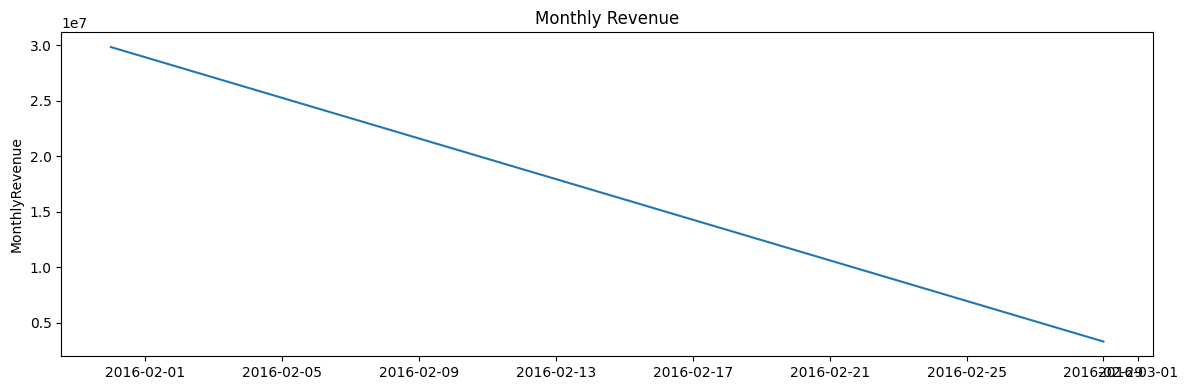

,SKU,Description,total_qty,total_revenue,avg_price,n_transactions
5815,4261,Capt Morgan Spiced Rum,20226,444810.74,21.993047,1969
4874,3545,Ketel One Vodka,11883,357759.17,30.174105,1749
346,1233,Jack Daniels No 7 Black,9578,344712.22,35.990000,1803
7198,8068,Absolut 80 Proof,11189,288135.11,25.776631,1870
4718,3405,Tito's Handmade Vodka,9203,275162.97,29.879714,1750
5325,3858,Grey Goose Vodka,9378,225014.22,24.001351,1762
3840,2589,Jameson Irish Whiskey,4649,191669.51,41.584883,1407
5772,4227,Bacardi Superior Rum Trav,10209,183659.91,17.990000,1699
589,1376,Jim Beam,7362,169922.38,23.177941,1841
3835,2585,Jameson Irish Whiskey,6940,164426.60,23.787695,1735


[SAVED] sku_abc.csv


,SKU,Description,total_qty,total_revenue,avg_price,n_transactions,cum_value,cum_perc,ABC
0,4261,Capt Morgan Spiced Rum,20226,444810.74,21.993047,1969,444810.74,0.013422,A
1,3545,Ketel One Vodka,11883,357759.17,30.174105,1749,802569.91,0.024218,A
2,1233,Jack Daniels No 7 Black,9578,344712.22,35.990000,1803,1147282.13,0.034620,A
3,8068,Absolut 80 Proof,11189,288135.11,25.776631,1870,1435417.24,0.043315,A
4,3405,Tito's Handmade Vodka,9203,275162.97,29.879714,1750,1710580.21,0.051618,A
5,3858,Grey Goose Vodka,9378,225014.22,24.001351,1762,1935594.43,0.058408,A
6,2589,Jameson Irish Whiskey,4649,191669.51,41.584883,1407,2127263.94,0.064191,A
7,4227,Bacardi Superior Rum Trav,10209,183659.91,17.990000,1699,2310923.85,0.069733,A
8,1376,Jim Beam,7362,169922.38,23.177941,1841,2480846.23,0.074861,A
9,2585,Jameson Irish Whiskey,6940,164426.60,23.787695,1735,2645272.83,0.079823,A


[SAVED] sku_eoq.csv


,SKU,Description,total_qty,total_revenue,avg_price,n_transactions,annual_demand_units,unit_cost_est,order_cost_S,holding_cost_H,EOQ_units
5815,4261,Capt Morgan Spiced Rum,20226,444810.74,21.993047,1969,123041.500000,22.99,200.0,4.598,3272
4874,3545,Ketel One Vodka,11883,357759.17,30.174105,1749,72288.250000,29.99,200.0,5.998,2196
346,1233,Jack Daniels No 7 Black,9578,344712.22,35.990000,1803,58266.166667,36.99,200.0,7.398,1775
7198,8068,Absolut 80 Proof,11189,288135.11,25.776631,1870,68066.416667,24.99,200.0,4.998,2334
4718,3405,Tito's Handmade Vodka,9203,275162.97,29.879714,1750,55984.916667,28.99,200.0,5.798,1965
5325,3858,Grey Goose Vodka,9378,225014.22,24.001351,1762,57049.500000,23.99,200.0,4.798,2181
3840,2589,Jameson Irish Whiskey,4649,191669.51,41.584883,1407,28281.416667,39.99,200.0,7.998,1189
5772,4227,Bacardi Superior Rum Trav,10209,183659.91,17.990000,1699,62104.750000,17.99,200.0,3.598,2628


[SAVED] sku_reorder_points.csv


,SKU,avg_daily_demand,std_daily_demand,sales_days,EOQ_units,annual_demand_units,lead_time_days,safety_stock_units,reorder_point_units
0,100,1.000000,0.000000,7,23,42.583333,7,0,7
1,1000,1.812500,1.682013,16,153,176.416667,7,7,20
2,1001,18.955556,54.084091,45,1316,5189.083333,7,235,368
3,10021,3.160000,1.841195,25,272,480.583333,7,8,30
4,1003,4.500000,4.123106,4,92,109.500000,7,18,50
5,10030,2.600000,1.505545,10,178,158.166667,7,7,25
6,1004,2.470588,4.317373,17,176,255.500000,7,19,36
7,1005,6.086957,7.896064,46,312,1703.333333,7,34,77


[INFO] PO columns: ['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']
Inferred PO cols: None None None None None VendorNumber
[WARN] Not enough PO date fields to compute lead days.
[WARN] Not enough PO qty fields to compute fill rate.
Running forecasts for top 50 SKUs (limit 200) ...


100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


[SAVED] sku_forecasts_arima.csv
Simulation sample SKU 4261: stockouts=0, avg_inventory=10895.316666666668
[SAVED] alerts_below_rop.csv rows: 193111


,SKU,reorder_point_units,on_hand,below_rop
183226,8111,5063,110.0,True
183225,8111,5063,143.0,True
183224,8111,5063,397.0,True
183223,8111,5063,201.0,True
183219,8111,5063,647.0,True
183222,8111,5063,123.0,True
183221,8111,5063,389.0,True
183220,8111,5063,133.0,True
183258,8111,5063,355.0,True
183218,8111,5063,158.0,True


Saved summaries to /content/outputs

NEXT STEPS:
- Tune CONFIG['default_order_cost'] and CONFIG['default_holding_rate'] using finance data
- Increase top_skus_for_models and forecast_limit_per_run if you want full coverage
- Create Streamlit/PowerBI dashboard using CSVs in outputs/
- Hook alerts_below_rop.csv to Slack/email for automated procurement alerts



In [33]:

import sys, os
import pkgutil, subprocess
def ensure(pkg):
    if not pkgutil.find_loader(pkg):
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg], stdout=subprocess.DEVNULL)
for p in ["pandas","numpy","matplotlib","seaborn","scipy","statsmodels","tqdm","scikit-learn"]:
    ensure(p)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (10,4)

# %% [markdown]
# ## 1. Configuration
# Update file paths if your CSVs are in different locations.

# %%
CONFIG = {
    "sales_path": "/content/SalesFINAL12312016.csv",
    "purchases_path": "/content/PurchasesFINAL12312016.csv",
    "prices_2017_path": "/content/2017PurchasePricesDec.csv",
    "beg_inv_path": "/content/BegInvFINAL12312016.csv",
    "end_inv_path": "/content/EndInvFINAL12312016.csv",
    "invoice_purchases_path": "/content/InvoicePurchases12312016.csv",
    "output_dir": "/content/outputs",
    "src_dir": "/content/src",
    "default_order_cost": 200.0,    # S (currency per order) - tune with finance
    "default_holding_rate": 0.20,   # H rate (fraction of unit cost/year) - tune with finance
    "service_level": 0.95,          # safety stock service level
    "forecast_horizon_days": 90,    # horizon for forecasts
    "top_skus_for_models": 50,      # how many top SKUs to build models for (adjust)
    "forecast_limit_per_run": 200   # to avoid runaway runs - set to None for all SKUs
}
os.makedirs(CONFIG["output_dir"], exist_ok=True)
os.makedirs(CONFIG["src_dir"], exist_ok=True)
print("CONFIG ready. Outputs ->", CONFIG["output_dir"])

# %% [markdown]
# ## 2. Helper module (src/inventory_utils.py)
# Creates reusable functions used below.

# %%
src_code = r"""
import numpy as np
from scipy.stats import norm

def eoq(D, S, H):
    if H <= 0:
        return np.nan
    return np.sqrt((2.0 * D * S) / H)

def safety_stock(sigma_daily, lead_time_days, service_level=0.95):
    z = norm.ppf(service_level)
    return z * sigma_daily * np.sqrt(max(1, lead_time_days))

def reorder_point(avg_daily, lead_time_days, sigma_daily, service_level=0.95):
    return avg_daily * lead_time_days + safety_stock(sigma_daily, lead_time_days, service_level)

def abc_classification(df, value_col='total_revenue', a_threshold=0.8, b_threshold=0.95):
    df = df.copy().sort_values(value_col, ascending=False).reset_index(drop=True)
    df['cum_value'] = df[value_col].cumsum()
    total = df[value_col].sum() if total:=df[value_col].sum() else 1.0
    df['cum_perc'] = df['cum_value'] / total
    def label(p):
        if p <= a_threshold:
            return 'A'
        elif p <= b_threshold:
            return 'B'
        else:
            return 'C'
    df['ABC'] = df['cum_perc'].apply(label)
    return df
"""
open(os.path.join(CONFIG["src_dir"], "inventory_utils.py"), "w").write(src_code)
if CONFIG["src_dir"] not in sys.path:
    sys.path.append(CONFIG["src_dir"])
from inventory_utils import eoq, safety_stock, reorder_point, abc_classification
print("Wrote src/inventory_utils.py and imported helpers.")

# %% [markdown]
# ## 3. Load CSVs (defensive)
# If a file is missing the notebook will continue with what's available.

# %%
def try_read(path, **kwargs):
    if path is None:
        return None
    if not os.path.exists(path):
        print(f"[WARN] Missing file: {path}")
        return None
    try:
        df = pd.read_csv(path, low_memory=False, **kwargs)
        print(f"[LOAD] {path} -> shape {df.shape}")
        return df
    except Exception as e:
        print(f"[ERROR] reading {path} : {e}")
        return None

sales = try_read(CONFIG["sales_path"])
purchases = try_read(CONFIG["purchases_path"])
prices_2017 = try_read(CONFIG["prices_2017_path"])
beg_inventory = try_read(CONFIG["beg_inv_path"])
end_inventory = try_read(CONFIG["end_inv_path"])
invoice_purchases = try_read(CONFIG["invoice_purchases_path"])

if sales is None:
    raise RuntimeError("Sales file is required. Update CONFIG.")

# %% [markdown]
# ## 4. Clean & standardize sales table
# Key outputs: SKU, SalesDate (datetime), SalesQuantity numeric, Revenue.

# %%
def clean_sales(df):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]
    # parse date (sample format '1/1/2016')
    df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce', infer_datetime_format=True, dayfirst=False)
    # numeric columns
    for c in ['SalesQuantity','SalesDollars','SalesPrice','Volume','ExciseTax']:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    # revenue
    df['Revenue'] = df['SalesDollars'] if 'SalesDollars' in df.columns else df['SalesQuantity'] * df.get('SalesPrice', 0)
    # SKU column - use Brand if present else InventoryId
    if 'Brand' in df.columns:
        df['SKU'] = df['Brand'].astype(str)
    else:
        df['SKU'] = df['InventoryId'].astype(str)
    # normalize Description, VendorName
    if 'Description' in df.columns:
        df['Description'] = df['Description'].astype(str).str.strip()
    if 'VendorName' in df.columns:
        df['VendorName'] = df['VendorName'].astype(str).str.strip()
    # drop rows missing essential fields
    df = df.dropna(subset=['SalesDate','SalesQuantity'])
    df = df.reset_index(drop=True)
    return df

sales = clean_sales(sales)
print("Sales cleaned:", sales.shape)
print("Date range:", sales['SalesDate'].min(), "->", sales['SalesDate'].max())
print("Unique SKUs:", sales['SKU'].nunique(), "Stores:", sales['Store'].nunique())

# persist cleaned sample
sales.head(3)

# %% [markdown]
# ## 5. EDA & aggregations
# daily/monthly time series, top SKUs by revenue & quantity.

# %%
# daily and monthly revenue
daily_rev = sales.groupby('SalesDate').agg(DailyRevenue=('Revenue','sum')).reset_index()
monthly_rev = sales.resample('M', on='SalesDate').agg(MonthlyRevenue=('Revenue','sum')).reset_index()
monthly_rev.to_csv(os.path.join(CONFIG['output_dir'],'monthly_revenue.csv'), index=False)
print("[SAVED] monthly_revenue.csv")

# SKU aggregations
sku_agg = sales.groupby(['SKU','Description']).agg(
    total_qty=('SalesQuantity','sum'),
    total_revenue=('Revenue','sum'),
    avg_price=('SalesPrice','mean'),
    n_transactions=('InventoryId','count')
).reset_index().sort_values('total_revenue', ascending=False)
sku_agg.to_csv(os.path.join(CONFIG['output_dir'],'sku_agg.csv'), index=False)
print("[SAVED] sku_agg.csv")

# quick visuals
plt.figure(figsize=(12,4))
sns.lineplot(data=monthly_rev, x='SalesDate', y='MonthlyRevenue')
plt.title("Monthly Revenue"); plt.xlabel(""); plt.tight_layout(); plt.show()

# top 10 SKUs by revenue
display(sku_agg.head(10))

# %% [markdown]
# ## 6. ABC analysis (Pareto)
# Classifies SKUs into A/B/C by cumulative revenue.

# %%
sku_abc = abc_classification(sku_agg, value_col='total_revenue', a_threshold=0.8, b_threshold=0.95)
sku_abc.to_csv(os.path.join(CONFIG['output_dir'],'sku_abc.csv'), index=False)
print("[SAVED] sku_abc.csv")
display(sku_abc.head(10))

# %% [markdown]
# ## 7. EOQ calculation
# Estimate annual demand, unit cost proxy, compute EOQ using default S/H; save for review.

# %%
obs_days = max((sales['SalesDate'].max() - sales['SalesDate'].min()).days + 1, 1)
sku_annual = sku_agg.copy()
sku_annual['annual_demand_units'] = sku_annual['total_qty'] * (365.0 / obs_days)

# unit cost proxy: try prices_2017 match by Brand/SKU else use avg_price
def estimate_unit_cost(row):
    if prices_2017 is not None:
        # heuristics: find candidate brand/sku & price columns
        for col in prices_2017.columns:
            if 'brand' in col.lower() or 'sku' in col.lower() or 'product' in col.lower():
                key_col = col; break
        else:
            key_col = None
        price_col = None
        for col in prices_2017.columns:
            if 'cost' in col.lower() or 'price' in col.lower():
                price_col = col; break
        if key_col and price_col:
            match = prices_2017[prices_2017[key_col].astype(str) == str(row['SKU'])]
            if not match.empty:
                try:
                    return float(match[price_col].iloc[0])
                except:
                    pass
    return float(row['avg_price'] if not np.isnan(row['avg_price']) else 0.0)

sku_annual['unit_cost_est'] = sku_annual.apply(estimate_unit_cost, axis=1)
sku_annual['order_cost_S'] = CONFIG['default_order_cost']
sku_annual['holding_cost_H'] = sku_annual['unit_cost_est'] * CONFIG['default_holding_rate']
sku_annual['EOQ_units'] = sku_annual.apply(lambda r: int(round(eoq(r['annual_demand_units'], r['order_cost_S'], r['holding_cost_H']))) if r['holding_cost_H']>0 else 0, axis=1)
sku_annual.to_csv(os.path.join(CONFIG['output_dir'],'sku_eoq.csv'), index=False)
print("[SAVED] sku_eoq.csv")
display(sku_annual.head(8))

# %% [markdown]
# ## 8. Reorder Point & Safety Stock
# Compute avg & std daily demand per SKU; estimate lead time heuristic; compute safety stock and ROP.

# %%
# daily demand per SKU
daily_sku = sales.groupby(['SKU','SalesDate']).agg(daily_qty=('SalesQuantity','sum')).reset_index()
sku_stats = daily_sku.groupby('SKU').agg(
    avg_daily_demand=('daily_qty','mean'),
    std_daily_demand=('daily_qty','std'),
    sales_days=('SalesDate','nunique')
).reset_index().fillna(0.0)
sku_stats = sku_stats.merge(sku_annual[['SKU','EOQ_units','annual_demand_units']], on='SKU', how='left')

# estimate lead time per SKU using invoice_purchases / purchases heuristics
def estimate_lead_time(sku, invoice_df, purchases_df):
    default = 7
    df = invoice_df if invoice_df is not None else purchases_df
    if df is None:
        return default
    cols_lower = [c.lower() for c in df.columns]
    sku_col = None
    order_col = None
    recv_col = None
    for c in df.columns:
        lc = c.lower()
        if 'brand' in lc or 'sku' in lc or 'product' in lc:
            sku_col = sku_col or c
        if 'order' in lc and 'date' in lc:
            order_col = order_col or c
        if ('receive' in lc or 'received' in lc or 'delivery' in lc or 'delivered' in lc) and 'date' in lc:
            recv_col = recv_col or c
    if sku_col is None or order_col is None or recv_col is None:
        return default
    tmp = df[[sku_col, order_col, recv_col]].copy()
    tmp[order_col] = pd.to_datetime(tmp[order_col], errors='coerce')
    tmp[recv_col] = pd.to_datetime(tmp[recv_col], errors='coerce')
    tmp = tmp[tmp[sku_col].astype(str) == str(sku)].dropna(subset=[order_col, recv_col])
    if tmp.empty:
        return default
    tmp['lead_days'] = (tmp[recv_col] - tmp[order_col]).dt.days
    med = int(tmp['lead_days'].median()) if not tmp['lead_days'].isna().all() else default
    return max(1, med)

# compute lead times for top SKUs (speed)
top_skus_for_lead = sku_stats.sort_values('avg_daily_demand', ascending=False).head(500)['SKU'].tolist()
lead_map = {}
for sku in top_skus_for_lead:
    lead_map[sku] = estimate_lead_time(sku, invoice_purchases, purchases)
default_lead = int(np.median(list(lead_map.values())) if lead_map else 7)
sku_stats['lead_time_days'] = sku_stats['SKU'].apply(lambda s: lead_map.get(s, default_lead))

# safety stock & reorder point
z = norm.ppf(CONFIG['service_level'])
sku_stats['safety_stock_units'] = (sku_stats['std_daily_demand'] * np.sqrt(sku_stats['lead_time_days']) * z).round().astype(int)
sku_stats['reorder_point_units'] = (sku_stats['avg_daily_demand'] * sku_stats['lead_time_days'] + sku_stats['safety_stock_units']).round().astype(int)
sku_stats.to_csv(os.path.join(CONFIG['output_dir'],'sku_reorder_points.csv'), index=False)
print("[SAVED] sku_reorder_points.csv")
display(sku_stats.head(8))

# %% [markdown]
# ## 9. Supplier / PO analysis (if PO data present)
# Compute vendor lead-time KPIs & fill rate if qty fields exist.

# %%
if invoice_purchases is not None or purchases is not None:
    dfpo = invoice_purchases if invoice_purchases is not None else purchases
    dfpo.columns = [c.strip() for c in dfpo.columns]
    print("[INFO] PO columns:", dfpo.columns.tolist()[:50])
    # heuristics
    sku_col = None; order_col = None; recv_col = None; qty_ord = None; qty_rec = None; vendor_col = None
    for c in dfpo.columns:
        lc = c.lower()
        if 'brand' in lc or 'sku' in lc or 'product' in lc:
            sku_col = sku_col or c
        if 'order' in lc and 'date' in lc:
            order_col = order_col or c
        if ('receive' in lc or 'received' in lc or 'delivery' in lc or 'deliv' in lc) and 'date' in lc:
            recv_col = recv_col or c
        if 'qty' in lc and ('ord' in lc or 'order' in lc):
            qty_ord = qty_ord or c
        if 'qty' in lc and ('rec' in lc or 'received' in lc):
            qty_rec = qty_rec or c
        if 'vendor' in lc or 'supplier' in lc or 'vendorname' in lc:
            vendor_col = vendor_col or c
    print("Inferred PO cols:", sku_col, order_col, recv_col, qty_ord, qty_rec, vendor_col)

    # lead times
    if order_col and recv_col:
        dfpo[order_col] = pd.to_datetime(dfpo[order_col], errors='coerce')
        dfpo[recv_col] = pd.to_datetime(dfpo[recv_col], errors='coerce')
        dfpo['lead_days'] = (dfpo[recv_col] - dfpo[order_col]).dt.days.clip(lower=0)
        vendor_kpis = dfpo.groupby(vendor_col).agg(median_lead=('lead_days','median'), lead_std=('lead_days','std'), orders=('lead_days','count')).reset_index().sort_values('median_lead')
        vendor_kpis.to_csv(os.path.join(CONFIG['output_dir'],'vendor_lead_kpis.csv'), index=False)
        print("[SAVED] vendor_lead_kpis.csv")
    else:
        print("[WARN] Not enough PO date fields to compute lead days.")

    # fill rate
    if qty_ord and qty_rec:
        dfpo[qty_ord] = pd.to_numeric(dfpo[qty_ord], errors='coerce').fillna(0)
        dfpo[qty_rec] = pd.to_numeric(dfpo[qty_rec], errors='coerce').fillna(0)
        dfpo['fill_rate'] = dfpo[qty_rec] / dfpo[qty_ord].replace({0:np.nan})
        fill_by_vendor = dfpo.groupby(vendor_col).agg(fill_rate_med=('fill_rate','median'), fill_rate_mean=('fill_rate','mean')).reset_index()
        fill_by_vendor.to_csv(os.path.join(CONFIG['output_dir'],'vendor_fill_rate.csv'), index=False)
        print("[SAVED] vendor_fill_rate.csv")
    else:
        print("[WARN] Not enough PO qty fields to compute fill rate.")
else:
    print("[INFO] No purchase/invoice PO dataset found; skipping PO KPIs.")

# %% [markdown]
# ## 10. Croston (intermittent demand) function
# We'll use it for SKUs with many zeros.

# %%
def croston(series, alpha=0.3, forecast_h=30):
    y = np.asarray(series)
    if y.sum() == 0:
        return np.zeros(forecast_h)
    # identify demand and intervals
    demands = []
    intervals = []
    last_index = None
    interval = 1
    for v in y:
        if v > 0:
            if last_index is None:
                last_index = 0
                interval = 1
            else:
                demands.append(v)
                intervals.append(interval)
                interval = 1
        else:
            interval += 1
    if len(demands) == 0:
        return np.zeros(forecast_h)
    q = demands[0]
    p = intervals[0]
    for i in range(1, len(demands)):
        q = alpha * demands[i] + (1-alpha) * q
        p = alpha * intervals[i] + (1-alpha) * p
    fc = q / p
    return np.repeat(fc, forecast_h)

# %% [markdown]
# ## 11. ARIMA forecasting functions & SKU loop
# - Croston for intermittent (>40% zeros)
# - ARIMA(1,1,1) for continuous SKUs with fallback to mean

# %%
def arima_forecast(series, forecast_h=30):
    y = np.asarray(series).astype(float)
    # handle very short series
    if len(y) < 10:
        return np.repeat(np.nan, forecast_h)
    try:
        model = ARIMA(y, order=(1,1,1))
        res = model.fit()
        fc = res.forecast(steps=forecast_h)
        return np.array(fc)
    except Exception:
        return np.repeat(np.nanmean(y), forecast_h)

def forecast_sku_df(ts_df, forecast_h=30, intermittent_threshold=0.40):
    """
    ts_df: DataFrame with columns ['ds','y'] where ds is datetime
    returns DataFrame ['ds','yhat']
    """
    ts_df = ts_df.sort_values('ds').reset_index(drop=True)
    y = ts_df['y'].values
    zero_ratio = (y == 0).mean()
    if zero_ratio >= intermittent_threshold:
        fc_vals = croston(y, alpha=0.3, forecast_h=forecast_h)
    else:
        fc_vals = arima_forecast(y, forecast_h=forecast_h)
    future_dates = pd.date_range(ts_df['ds'].max() + pd.Timedelta(days=1), periods=forecast_h)
    return pd.DataFrame({'ds': future_dates, 'yhat': fc_vals})

# Run forecasts for top SKUs by revenue (configurable)
top_k = CONFIG['top_skus_for_models']
top_skus = sku_agg.head(top_k)['SKU'].tolist()
forecast_h = CONFIG['forecast_horizon_days']
limit = CONFIG['forecast_limit_per_run']  # to avoid long runs
results = []
print(f"Running forecasts for top {len(top_skus)} SKUs (limit {limit}) ...")

for sku in tqdm(top_skus[:limit] if limit is not None else top_skus):
    d = sales[sales['SKU'] == sku].groupby('SalesDate').agg(y=('SalesQuantity','sum')).reset_index()
    d = d.rename(columns={'SalesDate':'ds'})
    if d.empty:
        continue
    d['ds'] = pd.to_datetime(d['ds'])
    fc = forecast_sku_df(d, forecast_h=forecast_h, intermittent_threshold=0.40)
    fc['SKU'] = sku
    results.append(fc)

if results:
    forecasts_df = pd.concat(results, ignore_index=True)
    forecasts_df.to_csv(os.path.join(CONFIG['output_dir'],'sku_forecasts_arima.csv'), index=False)
    print("[SAVED] sku_forecasts_arima.csv")
else:
    print("[INFO] No forecasts generated (no SKUs).")

# %% [markdown]
# ## 12. Stockout simulation (simple)
# Simulate inventory for a sample SKU comparing EOQ+ROP policy.

# %%
def simulate_inventory(daily_demand, initial_stock, eoq, reorder_point, lead_days, days):
    on_hand = initial_stock
    pipeline = []  # list of (arrival_day_index, qty)
    stockouts = 0
    hist = []
    for day in range(days):
        # arrivals
        arrivals = [a for a in pipeline if a[0] == day]
        for a in arrivals:
            on_hand += a[1]
        pipeline = [a for a in pipeline if a[0] > day]
        demand = int(daily_demand[day]) if day < len(daily_demand) else 0
        if on_hand < demand:
            stockouts += 1
            on_hand = max(0, on_hand - demand)  # will be zero
        else:
            on_hand -= demand
        hist.append(on_hand)
        if on_hand <= reorder_point and eoq > 0:
            arrival_day = day + lead_days
            pipeline.append((arrival_day, eoq))
    return {"stockouts": stockouts, "avg_inventory": np.mean(hist), "on_hand_hist": hist}

# simulate for one top SKU
sample_sku = top_skus[0] if top_skus else None
if sample_sku:
    ts = sales[sales['SKU']==sample_sku].groupby('SalesDate').agg(daily=('SalesQuantity','sum')).reindex(
        pd.date_range(sales['SalesDate'].min(), sales['SalesDate'].max(), freq='D'), fill_value=0).reset_index()
    ts.columns = ['ds','daily']
    rp = sku_stats[sku_stats['SKU']==sample_sku]['reorder_point_units'].iloc[0] if sample_sku in sku_stats['SKU'].values else 0
    eoq_val = sku_annual[sku_annual['SKU']==sample_sku]['EOQ_units'].iloc[0] if sample_sku in sku_annual['SKU'].values else max(1, int(ts['daily'].mean()*7))
    lead_days = sku_stats[sku_stats['SKU']==sample_sku]['lead_time_days'].iloc[0] if sample_sku in sku_stats['SKU'].values else 7
    initial = int(ts['daily'].mean()* (lead_days + 2))
    sim = simulate_inventory(ts['daily'].values, initial, int(eoq_val), int(rp), int(lead_days), len(ts))
    print(f"Simulation sample SKU {sample_sku}: stockouts={sim['stockouts']}, avg_inventory={sim['avg_inventory']}")

# %% [markdown]
# ## 13. Alerts: SKUs below ROP
# Uses end_inventory if present, else estimates on-hand from purchases - sales (best-effort).

# %%
# attempt to extract on-hand from end_inventory
def extract_onhand_from_inv(df_inv):
    if df_inv is None:
        return None
    df = df_inv.copy()
    df.columns = [c.strip() for c in df.columns]
    sku_col = None; qty_col = None
    for c in df.columns:
        lc = c.lower()
        if 'brand' in lc or 'sku' in lc or 'product' in lc:
            sku_col = sku_col or c
        if 'onhand' in lc or 'on_hand' in lc or 'quantity' in lc or 'qty' in lc:
            qty_col = qty_col or c
    if sku_col and qty_col:
        out = df[[sku_col, qty_col]].rename(columns={sku_col:'SKU', qty_col:'on_hand'})
        out['SKU'] = out['SKU'].astype(str)
        return out[['SKU','on_hand']]
    return None

onhand_df = extract_onhand_from_inv(end_inventory)
if onhand_df is None:
    # estimate: purchased - sold using invoice_purchases if available
    if invoice_purchases is not None:
        dfip = invoice_purchases.copy(); dfip.columns=[c.strip() for c in dfip.columns]
        sku_col=None; qty_col=None
        for c in dfip.columns:
            lc=c.lower()
            if 'brand' in lc or 'sku' in lc or 'product' in lc:
                sku_col = sku_col or c
            if 'qty' in lc or 'quantity' in lc:
                qty_col = qty_col or c
        if sku_col and qty_col:
            pur_agg = dfip.groupby(dfip[sku_col].astype(str))[qty_col].sum().reset_index().rename(columns={qty_col:'purchased_qty', sku_col:'SKU'})
            sold_agg = sku_agg[['SKU','total_qty']].rename(columns={'total_qty':'sold_qty'})
            est = pur_agg.merge(sold_agg, on='SKU', how='outer').fillna(0)
            est['on_hand'] = est['purchased_qty'] - est['sold_qty']
            onhand_df = est[['SKU','on_hand']]
        else:
            onhand_df = pd.DataFrame({'SKU': sku_agg['SKU'].astype(str), 'on_hand': 0})
    else:
        onhand_df = pd.DataFrame({'SKU': sku_agg['SKU'].astype(str), 'on_hand': 0})

# merge with reorder points
rp_df = sku_stats[['SKU','reorder_point_units']].copy()
alerts = rp_df.merge(onhand_df, on='SKU', how='left').fillna(0)
alerts['below_rop'] = alerts['on_hand'] <= alerts['reorder_point_units']
alerts_to_action = alerts[alerts['below_rop']].sort_values('reorder_point_units', ascending=False)
alerts_to_action.to_csv(os.path.join(CONFIG['output_dir'],'alerts_below_rop.csv'), index=False)
print("[SAVED] alerts_below_rop.csv rows:", alerts_to_action.shape[0])
display(alerts_to_action.head(20))

# %% [markdown]
# ## 14. Save final summaries & README-like output
# All major CSVs saved under /content/snooze_outputs/

# %%
# save key outputs
sku_abc.to_csv(os.path.join(CONFIG['output_dir'],'sku_abc.csv'), index=False)
sku_annual.to_csv(os.path.join(CONFIG['output_dir'],'sku_eoq_summary.csv'), index=False)
sku_stats.to_csv(os.path.join(CONFIG['output_dir'],'sku_stats_summary.csv'), index=False)
if 'forecasts_df' in globals():
    forecasts_df.to_csv(os.path.join(CONFIG['output_dir'],'sku_forecasts_full.csv'), index=False)
print("Saved summaries to", CONFIG['output_dir'])
